### Logistic regression: line plot

In [20]:
# Libraries
import sys, os
import mne # Python package for processing and analyzing electrophysiological data
import pickle
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# load data
# ~~~~~~~~~~~~~~ Parameters
group = 'adult'
modality = 'visual' # 'visual' or 'audio'

# Print out each parameter
print(f"{group}: {modality} data will be visualized")
# ~~~~~~~~~~~~~~ Parameters ~~~~~~~~~~~~~~


# ~~~~~~~~~~~~~~ Set the working directory
path = f"/u/kazma/MINT/data/{group}/processed/{modality}"
sub_folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
sub_folders_sorted = sorted(sub_folders, key=lambda x: int(re.search(r'\d+', x).group())) # Sort the folders based on the numeric part after "sub-"
# ~~~~~~~~~~~~~~ Set the working directory ~~~~~~~~~~~~~~



### SUB_LOOP
subject = sub_folders_sorted[0]


# each subject's file name
sub_filename = os.path.join(path, subject, 'accuracy_pairwise.pkl')

# Open the file and load data
with open(sub_filename, 'rb') as file:
    data = pickle.load(file)
data = pd.DataFrame(data)

# Define column names as shown in the image
column_names = [
    "1 vs. 2",
    "1 vs. 3",
    "1 vs. 4",
    "1 vs. 5",
    "1 vs. 6",
    "2 vs. 3",
    "2 vs. 4",
    "2 vs. 5",
    "2 vs. 6",
    "3 vs. 4",
    "3 vs. 5",
    "3 vs. 6",
    "4 vs. 5",
    "4 vs. 6",
    "5 vs. 6"
]

# Convert column name
data.columns=column_names

average = data.mean(axis=1)


adult: visual data will be visualized


### Ploat all pairs

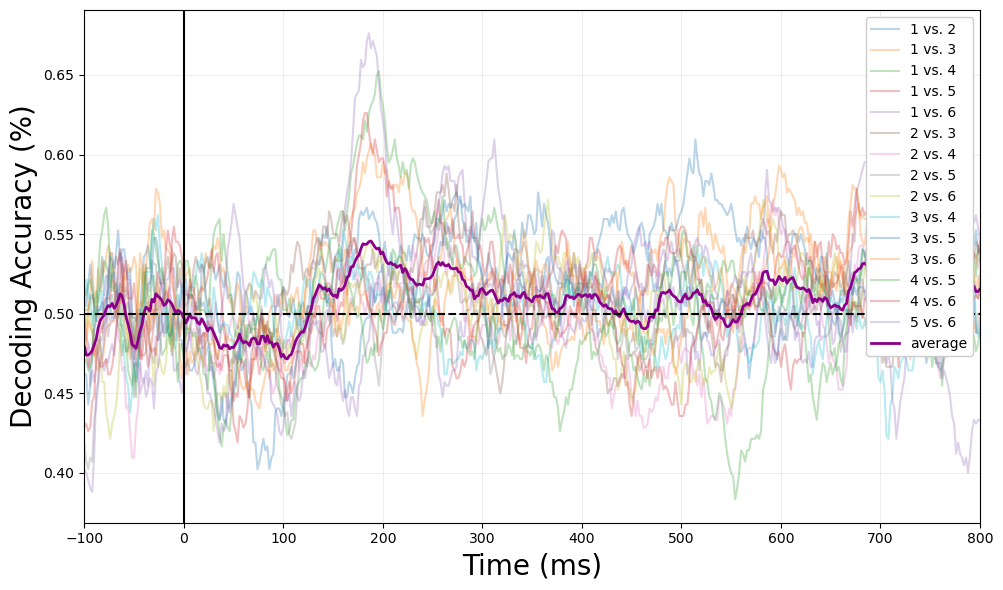

In [ ]:
# Plot each column
x = np.linspace(-100,1000,551)

plt.figure(figsize=(10, 6))
for column in data.columns:
    plt.plot(x, data[column], label=column, alpha=0.3)

plt.plot(x, average, label='average', alpha=1, color='darkmagenta', linewidth=2)

# Customize the plot
plt.xlabel('Time (ms)', size=20)
plt.ylabel('Decoding Accuracy (%)', size=20)
plt.legend(loc='upper right', fontsize=10, framealpha=1)
plt.grid(alpha=0.2)
plt.axvline(0, color='black')
plt.axhline(0.5,color='black', linestyle='--')
plt.tight_layout()
plt.xlim(-100,800)

# save the image
plt.savefig(f"{path}/{subject}/timeresolved_decoding.png", dpi=300, bbox_inches='tight')

plt.show()

### Plot only 1 vs pairs

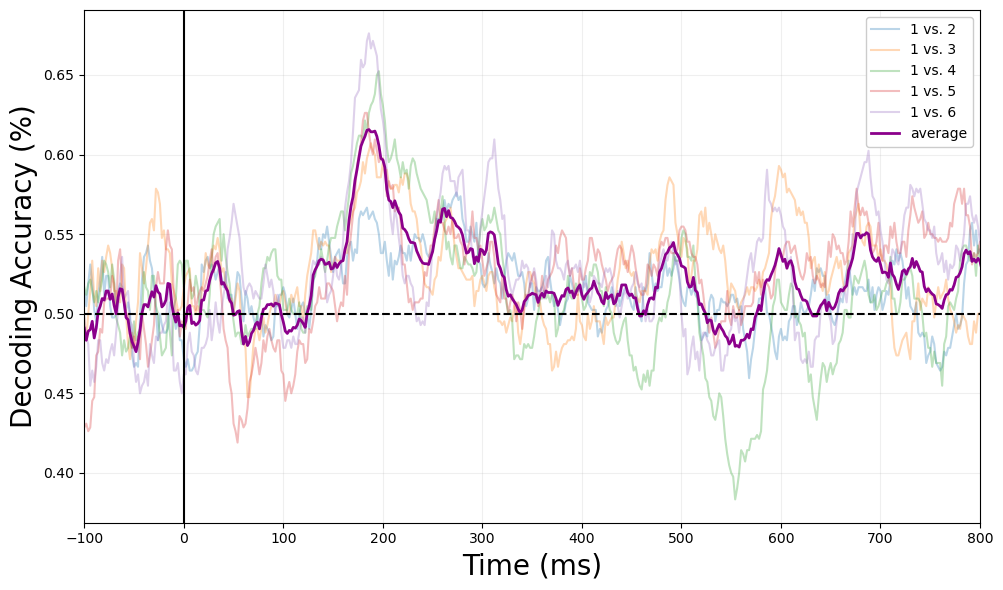

In [69]:
# Plot each column
x = np.linspace(-100,1000,551)

average = data.iloc[:,:5].mean(axis=1)

plt.figure(figsize=(10, 6))
alpha=0.3
plt.plot(x, data['1 vs. 2'], label='1 vs. 2', alpha=alpha)
plt.plot(x, data['1 vs. 3'], label='1 vs. 3', alpha=alpha)
plt.plot(x, data['1 vs. 4'], label='1 vs. 4', alpha=alpha)
plt.plot(x, data['1 vs. 5'], label='1 vs. 5', alpha=alpha)
plt.plot(x, data['1 vs. 6'], label='1 vs. 6', alpha=alpha)

plt.plot(x, average, label='average', alpha=1, color='darkmagenta', linewidth=2)

# Customize the plot
plt.xlabel('Time (ms)', size=20)
plt.ylabel('Decoding Accuracy (%)', size=20)
plt.legend(loc='upper right', fontsize=10, framealpha=1)
plt.grid(alpha=0.2)
plt.axvline(0, color='black')
plt.axhline(0.5,color='black', linestyle='--')
plt.tight_layout()
plt.xlim(-100,800)

# save the image
plt.savefig(f"{path}/{subject}/timeresolved_decoding_1vs.png", dpi=300, bbox_inches='tight')

plt.show()

# Whole code

adult: visual data will be visualized


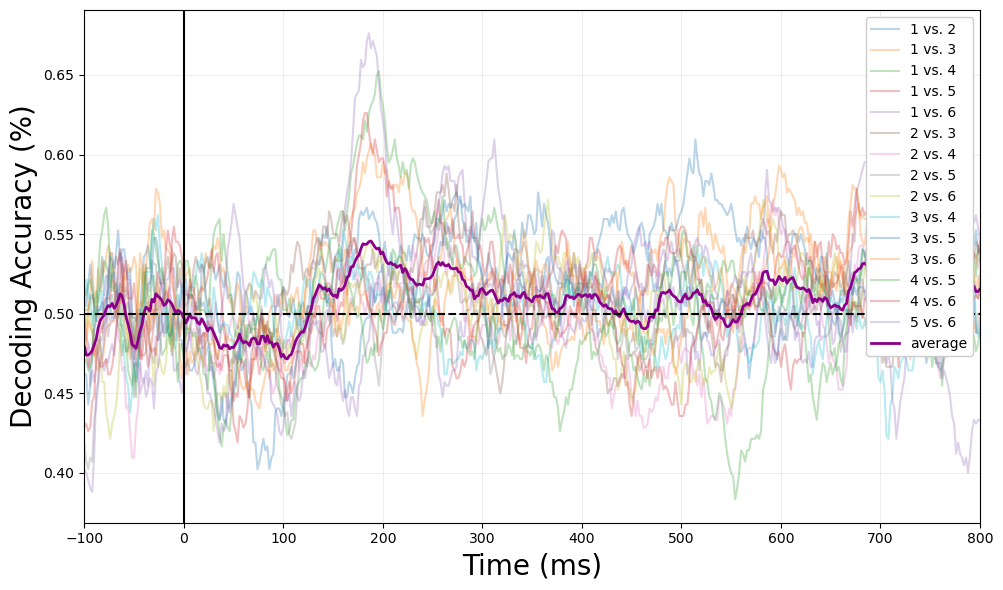

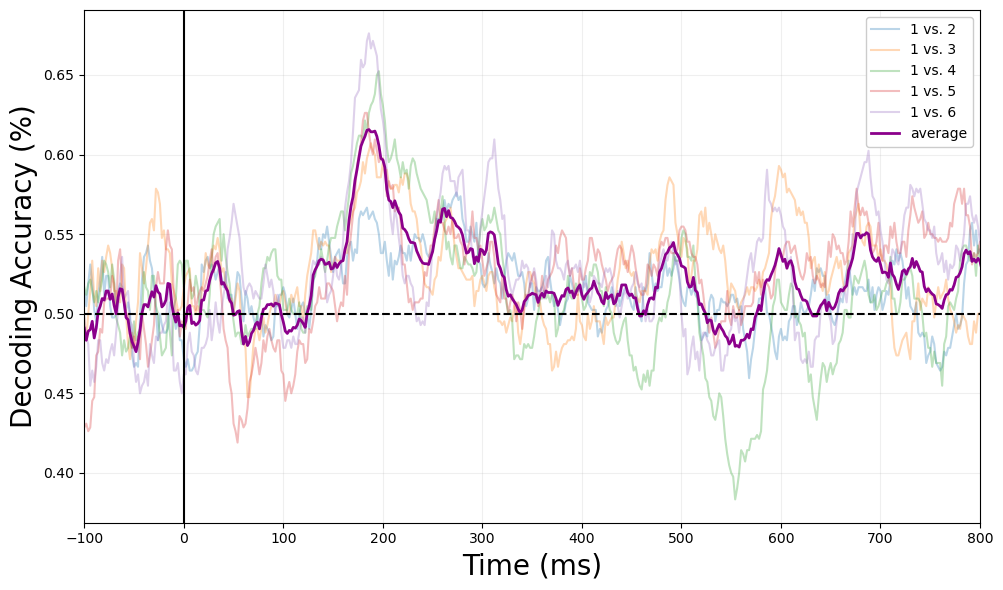

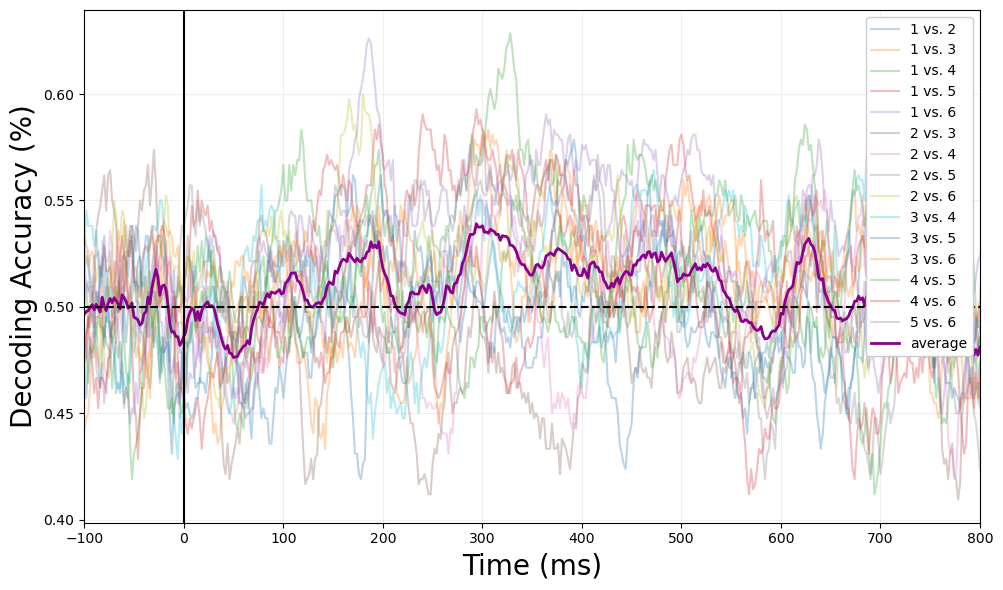

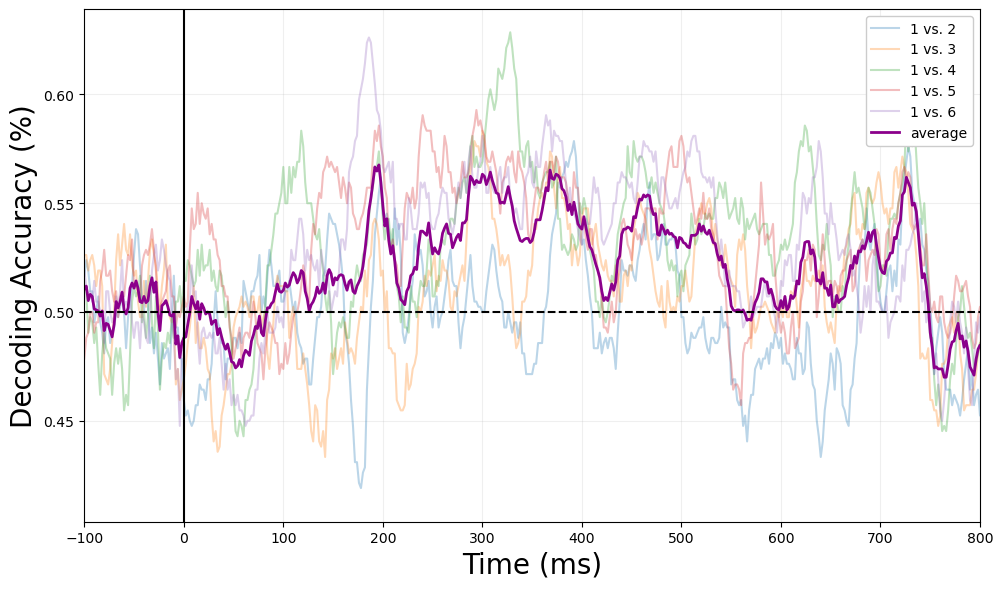

In [70]:
# Libraries
import sys, os
import mne # Python package for processing and analyzing electrophysiological data
import pickle
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# load data
# ~~~~~~~~~~~~~~ Parameters
group = 'adult'
modality = 'visual' # 'visual' or 'audio'

# Print out each parameter
print(f"{group}: {modality} data will be visualized")
# ~~~~~~~~~~~~~~ Parameters ~~~~~~~~~~~~~~


# ~~~~~~~~~~~~~~ Set the working directory
path = f"/u/kazma/MINT/data/{group}/processed/{modality}"
sub_folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
sub_folders_sorted = sorted(sub_folders, key=lambda x: int(re.search(r'\d+', x).group())) # Sort the folders based on the numeric part after "sub-"
# ~~~~~~~~~~~~~~ Set the working directory ~~~~~~~~~~~~~~



# ~~~~~~~~~~~~~~ SUB_LOOP
for subject in sub_folders_sorted:


    # each subject's file name
    sub_filename = os.path.join(path, subject, 'accuracy_pairwise.pkl')

    # Open the file and load data
    with open(sub_filename, 'rb') as file:
        data = pickle.load(file)
    data = pd.DataFrame(data)

    # Define column names as shown in the image
    column_names = [
        "1 vs. 2", "1 vs. 3", "1 vs. 4", "1 vs. 5", "1 vs. 6",
        "2 vs. 3", "2 vs. 4", "2 vs. 5", "2 vs. 6",
        "3 vs. 4", "3 vs. 5", "3 vs. 6",
        "4 vs. 5", "4 vs. 6",
        "5 vs. 6"
    ]

    # Convert column name
    data.columns=column_names




    # ~~~~~~~~~~~ Plot 
    x = np.linspace(-100,1000,551)


    ### whole conditions
    plt.figure(figsize=(10, 6))
    for column in data.columns:
        plt.plot(x, data[column], label=column, alpha=0.3)

    # avearge across conditions
    average = data.mean(axis=1)
    plt.plot(x, average, label='average', alpha=1, color='darkmagenta', linewidth=2)

    # Customize the plot
    plt.xlabel('Time (ms)', size=20)
    plt.ylabel('Decoding Accuracy (%)', size=20)
    plt.legend(loc='upper right', fontsize=10, framealpha=1)
    plt.grid(alpha=0.2)
    plt.axvline(0, color='black')
    plt.axhline(0.5,color='black', linestyle='--')
    plt.tight_layout()
    plt.xlim(-100,800)

    # save the image
    plt.savefig(f"{path}/{subject}/timeresolved_decoding.png", dpi=300, bbox_inches='tight')

    plt.show()




    ### plot only 1 vs...
    plt.figure(figsize=(10, 6))
    alpha=0.3
    plt.plot(x, data['1 vs. 2'], label='1 vs. 2', alpha=alpha)
    plt.plot(x, data['1 vs. 3'], label='1 vs. 3', alpha=alpha)
    plt.plot(x, data['1 vs. 4'], label='1 vs. 4', alpha=alpha)
    plt.plot(x, data['1 vs. 5'], label='1 vs. 5', alpha=alpha)
    plt.plot(x, data['1 vs. 6'], label='1 vs. 6', alpha=alpha)

    # average across 1vs.. conditions
    average = data.iloc[:,:5].mean(axis=1)
    plt.plot(x, average, label='average', alpha=1, color='darkmagenta', linewidth=2)

    # Customize the plot
    plt.xlabel('Time (ms)', size=20)
    plt.ylabel('Decoding Accuracy (%)', size=20)
    plt.legend(loc='upper right', fontsize=10, framealpha=1)
    plt.grid(alpha=0.2)
    plt.axvline(0, color='black')
    plt.axhline(0.5,color='black', linestyle='--')
    plt.tight_layout()
    plt.xlim(-100,800)

    # save the image
    plt.savefig(f"{path}/{subject}/timeresolved_decoding_1vs.png", dpi=300, bbox_inches='tight')

    plt.show()